# Q1 - Which User is interacting with the page the highest? (Interactions = Likes + Shares + Comments)

In [1]:
#import required libraries
import numpy as np 
import pandas as pd

In [2]:
#loading the excel sheets into notebook
excel_sheets =pd.ExcelFile('/content/drive/MyDrive/Question Set - FB_Page_Decoder.xlsx')

#checking the names of sheets present
excel_sheets.sheet_names

#creating separate dataframes for the sheets

df_posts=excel_sheets.parse('Post_List')
df_comments=excel_sheets.parse('Comments')
df_reactions=excel_sheets.parse('Reactions')
df_shares=excel_sheets.parse('Shares')

In [3]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   post_date          28 non-null     datetime64[ns]
 1   Post_Text          28 non-null     object        
 2   Post_Embedded_URL  21 non-null     object        
 3   Post_URL           28 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.0+ KB


In [4]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            741 non-null    object
 1   People_URL      741 non-null    object
 2   Page_Or_Person  741 non-null    object
 3   Post_URL        741 non-null    object
 4   Comment         732 non-null    object
dtypes: object(5)
memory usage: 29.1+ KB


In [5]:
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Reactions_By      2675 non-null   object
 1   Reactions_By_URL  2675 non-null   object
 2   Reactions_What    2675 non-null   object
 3   Page_Or_Person    2675 non-null   object
 4   Post_URL          2675 non-null   object
dtypes: object(5)
memory usage: 104.6+ KB


In [6]:
df_shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Shares_By       241 non-null    object
 1   Shares_By_URL   241 non-null    object
 2   Page_Or_Person  241 non-null    object
 3   Total_Share     241 non-null    object
 4   Post_URL        241 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


In [7]:
df_posts.head()

,post_date,Post_Text,Post_Embedded_URL,Post_URL
0,2020-07-22,"Dear Shankra Family, \n first of all, we want ...",http://bit.ly/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=30...
1,2020-10-30,Walking towards the future with the strongest ...,b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
2,2020-10-27,"The Mesolcina Mountain Chain, home to Shankra ...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
3,2020-10-24,"We believe in pure music, freely expressed by ...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
4,2020-10-21,"The beating heart of our Valley, Shankra Stage...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...


In [8]:
df_comments.head()

,Name,People_URL,Page_Or_Person,Post_URL,Comment
0,Andreas Kenotaph,https://m.facebook.com/andreas.inkmann,Person,https://m.facebook.com/story.php?story_fbid=30...,Felt good to give you something back for all t...
1,Top fan\nLuca Maccarone,https://m.facebook.com/luca.maccarone.7,Person,https://m.facebook.com/story.php?story_fbid=30...,I already canâ€™t wait for next year ðŸ˜ It w...
2,Lia Silva,https://m.facebook.com/alma.lilly.aho,Person,https://m.facebook.com/story.php?story_fbid=30...,Is the line up remaining the same?ðŸ¦‹
3,Author\nShankra Festival,https://m.facebook.com/shankrafestival/,Page,https://m.facebook.com/story.php?story_fbid=30...,yes :)
4,Author\nShankra Festival,https://m.facebook.com/shankrafestival/,Page,https://m.facebook.com/story.php?story_fbid=30...,"Yes, tickets for the 2020's edition will grant..."


In [9]:
df_reactions.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL
0,Aremacs Sud-Est,https://m.facebook.com/AremacsSudEst/,Like,Page,https://m.facebook.com/story.php?story_fbid=30...
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagaz...,Love,Page,https://m.facebook.com/story.php?story_fbid=30...
2,Vale DeKÃ¬,https://m.facebook.com/vale.deki.5,Like,Person,https://m.facebook.com/story.php?story_fbid=30...
3,AndrÃ© Novais,https://m.facebook.com/andre.novais.7777,Like,Person,https://m.facebook.com/story.php?story_fbid=30...
4,Luca Luca,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=30...


In [10]:
df_shares.head()

,Shares_By,Shares_By_URL,Page_Or_Person,Total_Share,Post_URL
0,Eric Keriguy,https://m.facebook.com/eric.keriguy.7,Person,56 shares,https://m.facebook.com/story.php?story_fbid=30...
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagaz...,Page,56 shares,https://m.facebook.com/story.php?story_fbid=30...
2,Dj Kalanio,https://m.facebook.com/kalanio44/,Page,56 shares,https://m.facebook.com/story.php?story_fbid=30...
3,Silvia Sey,https://m.facebook.com/silvia.mandelli.73,Person,56 shares,https://m.facebook.com/story.php?story_fbid=30...
4,Giovanni Ricciardi,https://m.facebook.com/giovanniricciardijunior,Person,56 shares,https://m.facebook.com/story.php?story_fbid=30...


In [11]:
type(df_posts)

pandas.core.frame.DataFrame

In [12]:
share_inter_page_df = df_shares[df_shares['Page_Or_Person'] == 'Page']
react_inter_page_df = df_reactions[df_reactions['Page_Or_Person'] == 'Page']
comment_inter_page_df = df_comments[df_comments['Page_Or_Person'] == 'Page']

In [13]:
share_inter_page_df.reset_index(drop=True,inplace=True)
react_inter_page_df.reset_index(drop=True,inplace=True)
comment_inter_page_df.reset_index(drop=True,inplace=True)

In [14]:
share_count_df=pd.DataFrame(share_inter_page_df.Shares_By.value_counts())
share_count_df

,Shares_By
synthetik chaos,2
DMT FM - Psytrance Radio...,1
Stagebox,1
Goa Tribe Trance,1
JOY Entertainment,1
NANIROSSI -artisti di strada...,1
TrancEuphoria,1
NEW FORUM FRANCE Hippie...,1
PSY Society- Azores,1
à¥ Psy Namah,1


In [15]:
#repeating the same with other dataframes 

react_count_df=pd.DataFrame(react_inter_page_df.Reactions_By.value_counts())
comment_count_df=pd.DataFrame(comment_inter_page_df.Name.value_counts())

#rename the column
comment_count_df.rename(columns={"Name": "Comments_By"}, inplace=True)

#merging the dataframes to single df for result

total_react=pd.concat([share_count_df,react_count_df,comment_count_df],axis=1, join= 'outer')
total_react['Total_Interactions']=total_react.sum(axis=1)

total_react.replace(np.nan,0,inplace = True)
total_react

,Shares_By,Reactions_By,Comments_By,Total_Interactions
synthetik chaos,2.0,0.0,0.0,2.0
DMT FM - Psytrance Radio...,1.0,0.0,0.0,1.0
Stagebox,1.0,0.0,0.0,1.0
Goa Tribe Trance,1.0,0.0,0.0,1.0
JOY Entertainment,1.0,0.0,0.0,1.0
...,...,...,...,...
Organic Soup,0.0,0.0,1.0,1.0
Tranonica_Official,0.0,0.0,1.0,1.0
Waio,0.0,0.0,1.0,1.0
The Nomadic Daughter Photography,0.0,0.0,1.0,1.0


In [16]:
#reset & rename the column
total_react.reset_index(inplace=True)
total_react.rename(columns={"index": "User_Name"}, inplace=True)
total_react

,User_Name,Shares_By,Reactions_By,Comments_By,Total_Interactions
0,synthetik chaos,2.0,0.0,0.0,2.0
1,DMT FM - Psytrance Radio...,1.0,0.0,0.0,1.0
2,Stagebox,1.0,0.0,0.0,1.0
3,Goa Tribe Trance,1.0,0.0,0.0,1.0
4,JOY Entertainment,1.0,0.0,0.0,1.0
...,...,...,...,...,...
85,Organic Soup,0.0,0.0,1.0,1.0
86,Tranonica_Official,0.0,0.0,1.0,1.0
87,Waio,0.0,0.0,1.0,1.0
88,The Nomadic Daughter Photography,0.0,0.0,1.0,1.0


In [17]:
#top five User Interaction
top_5 = total_react.sort_values(by=['Total_Interactions'], ascending=False).head(5)
top_5.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


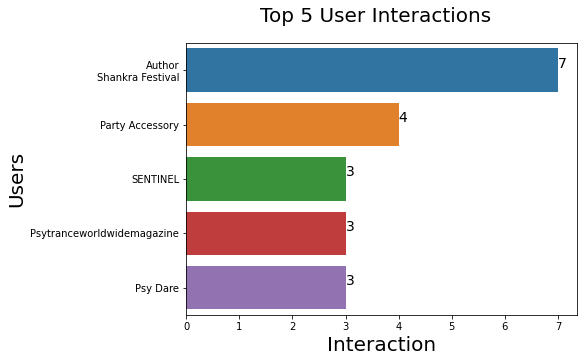

In [18]:
### Generate a Barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plot = sns.barplot(top_5['Total_Interactions'], top_5['User_Name'])
for i,(value,name) in enumerate(zip(top_5['Total_Interactions'],top_5['User_Name'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=14)
plt.suptitle('Top 5 User Interactions',fontsize = 20)
plt.xlabel("Interaction",fontsize = 20)
plt.ylabel("Users",fontsize = 20)
plt.show();

In [19]:
print("{user_name[0]} user is the most {interact_num[0]} times interacting with the page".format(user_name = top_5['User_Name'],interact_num=top_5['Total_Interactions']))

Author
Shankra Festival user is the most 7.0 times interacting with the page


# Q2- In Post_List, you have a column called Post_Text - Identify the Keywords on which interactions are the highest. (Interactions = Likes + Shares + Comments)

In [20]:
#merging the dataframes to single df for result
url_commt_count=pd.DataFrame(df_comments.Post_URL.value_counts()).rename(columns={'Post_URL':'Comment_count'})
url_react_count=pd.DataFrame(df_reactions.Post_URL.value_counts()).rename(columns={'Post_URL':'Reaction_count'})
url_share_count=pd.DataFrame(df_shares.Post_URL.value_counts()).rename(columns={'Post_URL':'Share_count'})
url_total_count=pd.concat([url_commt_count,url_react_count,url_share_count], axis=1, join= 'outer')
url_total_count['Total_reactions']=url_total_count.sum(axis=1)

url_total_count.head()

,Comment_count,Reaction_count,Share_count,Total_reactions
https://m.facebook.com/story.php?story_fbid=2440962296025518&id=632170870238012&__tn__=-R,93.0,95,28.0,216.0
https://m.facebook.com/story.php?story_fbid=2450929748362106&id=632170870238012&__tn__=-R,89.0,94,30.0,213.0
https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,86.0,91,29.0,206.0
https://m.facebook.com/story.php?story_fbid=2824549447666799&id=632170870238012&__tn__=-R,66.0,92,21.0,179.0
https://m.facebook.com/story.php?story_fbid=2503349356453478&id=632170870238012&__tn__=-R,64.0,91,25.0,180.0


In [21]:
#high interaction URL 
url_max_react_count=url_total_count.Total_reactions.idxmax()
url_max_react_count

'https://m.facebook.com/story.php?story_fbid=2440962296025518&id=632170870238012&__tn__=-R'

In [22]:
df_posts.head()

,post_date,Post_Text,Post_Embedded_URL,Post_URL
0,2020-07-22,"Dear Shankra Family, \n first of all, we want ...",http://bit.ly/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=30...
1,2020-10-30,Walking towards the future with the strongest ...,b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
2,2020-10-27,"The Mesolcina Mountain Chain, home to Shankra ...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
3,2020-10-24,"We believe in pure music, freely expressed by ...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...
4,2020-10-21,"The beating heart of our Valley, Shankra Stage...",b.link/ShankraTickets2021,https://m.facebook.com/story.php?story_fbid=33...


In [23]:
#high interaction post
df_max_react=df_posts.Post_Text.loc[df_posts['Post_URL']==url_max_react_count]

In [24]:
print(df_max_react.iloc[0])

Dear Shankra Family, 
 we are delighted to announce the second artist of our 6th edition: 
 Goa Gil will play a 24 hours long set, from sunset to sunset, opening our Lotus Floor, welcome back <3 
 Join us: http://bit.ly/ShankraTickets2020 
 Your Life is Your Message
Shankra Team
www.shankrafestival.ch


In [25]:
#loading required libraries
!pip install nltk
!pip install stop_words

In [26]:
#import required libraries
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk import tokenize
from operator import itemgetter
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
post = df_max_react.iloc[0]

In [28]:
#counting total number of word in post
total_words = post.split()
total_word_length = len(total_words)
print(total_word_length)

46


In [29]:
#counting number of sentences in post

total_sentences = tokenize.sent_tokenize(post)
total_sent_len = len(total_sentences)
print(total_sent_len)

1


In [30]:
#calculating tf score

tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Dear': 0.021739130434782608, 'Shankra': 0.043478260869565216, 'Family,': 0.021739130434782608, 'delighted': 0.021739130434782608, 'announce': 0.021739130434782608, 'second': 0.021739130434782608, 'artist': 0.021739130434782608, '6th': 0.021739130434782608, 'edition:': 0.021739130434782608, 'Goa': 0.021739130434782608, 'Gil': 0.021739130434782608, 'play': 0.021739130434782608, '24': 0.021739130434782608, 'hours': 0.021739130434782608, 'long': 0.021739130434782608, 'set,': 0.021739130434782608, 'sunset': 0.021739130434782608, 'sunset,': 0.021739130434782608, 'opening': 0.021739130434782608, 'Lotus': 0.021739130434782608, 'Floor,': 0.021739130434782608, 'welcome': 0.021739130434782608, 'back': 0.021739130434782608, '<3': 0.021739130434782608, 'Join': 0.021739130434782608, 'us:': 0.021739130434782608, 'http://bitly/ShankraTickets2020': 0.021739130434782608, 'Your': 0.043478260869565216, 'Life': 0.021739130434782608, 'Message': 0.021739130434782608, 'Team': 0.021739130434782608, 'wwwshank

In [31]:
#to know the keyword with hisghest interaction 

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

print(get_top_n(tf_score,1))

{'Shankra': 0.043478260869565216}


# Q3- In Comments, you have a column called comment - Create a wordcloud AFTER cleaning the data properly.

## Pre-processing text data
*Text data are cleaned by following below steps.*

- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Remove stopwords
- Lammetization/stemming - Tranforming any form of a word to its root word

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
df_comments

,Name,People_URL,Page_Or_Person,Post_URL,Comment
0,Andreas Kenotaph,https://m.facebook.com/andreas.inkmann,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,Felt good to give you something back for all the efforts in the last years... We are really look...
1,Top fan\nLuca Maccarone,https://m.facebook.com/luca.maccarone.7,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...
2,Lia Silva,https://m.facebook.com/alma.lilly.aho,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,Is the line up remaining the same?ðŸ¦‹
3,Author\nShankra Festival,https://m.facebook.com/shankrafestival/,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,yes :)
4,Author\nShankra Festival,https://m.facebook.com/shankrafestival/,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,"Yes, tickets for the 2020's edition will grant you access to next year's festival!"
...,...,...,...,...,...
736,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagazine/,Page,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,Retro setðŸ˜ðŸ˜ðŸ˜ðŸ˜ðŸ˜ðŸ˜ mega nice ðŸ‘ðŸ‘ðŸ‘â¤ï¸
737,Top fan\nSonja Ivory Carangelo,https://m.facebook.com/sonja.ibeh,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,ðŸ¤©
738,Lotus Spirit,https://m.facebook.com/profile.php,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,ðŸ˜ŠðŸ¤©ðŸ˜Š
739,Benedikt Christopeit,https://m.facebook.com/bchristopeit,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,ðŸ‘


In [36]:
comment_df = pd.DataFrame(df_comments[['Name','Comment']])


In [37]:
comment_df

,Name,Comment
0,Andreas Kenotaph,Felt good to give you something back for all the efforts in the last years... We are really look...
1,Top fan\nLuca Maccarone,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...
2,Lia Silva,Is the line up remaining the same?ðŸ¦‹
3,Author\nShankra Festival,yes :)
4,Author\nShankra Festival,"Yes, tickets for the 2020's edition will grant you access to next year's festival!"
...,...,...
736,Psytranceworldwidemagazine,Retro setðŸ˜ðŸ˜ðŸ˜ðŸ˜ðŸ˜ðŸ˜ mega nice ðŸ‘ðŸ‘ðŸ‘â¤ï¸
737,Top fan\nSonja Ivory Carangelo,ðŸ¤©
738,Lotus Spirit,ðŸ˜ŠðŸ¤©ðŸ˜Š
739,Benedikt Christopeit,ðŸ‘


## Remove punctuations

In [38]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = ''.join([c for c in text if ord(c) < 128])
    return text

comment_df['comment_punct'] = comment_df['Comment'].apply(lambda x: remove_punct(str(x)))
comment_df.head(10)

,Name,Comment,comment_punct
0,Andreas Kenotaph,Felt good to give you something back for all the efforts in the last years... We are really look...,Felt good to give you something back for all the efforts in the last years We are really looking...
1,Top fan\nLuca Maccarone,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...,I already cant wait for next year It will be even greater caus of the missing year It feels lik...
2,Lia Silva,Is the line up remaining the same?ðŸ¦‹,Is the line up remaining the same
3,Author\nShankra Festival,yes :),yes
4,Author\nShankra Festival,"Yes, tickets for the 2020's edition will grant you access to next year's festival!",Yes tickets for the s edition will grant you access to next years festival
5,Lise Gross,Lucas Bourget meme line up ^^,Lucas Bourget meme line up
6,Lily Ternois,ElÃ©a Httniegir ðŸ˜ðŸ˜â¤ï¸,Ela Httniegir
7,Ana Sofia Bras,Aguardo com muita serenidade pela minha primeira Shanka em 2021 ðŸ¦‹ðŸŒ»ðŸ˜ðŸ˜‰,Aguardo com muita serenidade pela minha primeira Shanka em
8,Top fan\nDylan Lopes,E eu tambem.\nShankra lets go,E eu tambem\nShankra lets go
9,Pedro Raimundo,Always Shankra Family â¤ï¸Full Support,Always Shankra Family Full Support


## Tokenization

In [39]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

comment_df['fb_com_tokenized'] = comment_df['comment_punct'].apply(lambda x: tokenization(x.lower()))
comment_df.head()

,Name,Comment,comment_punct,fb_com_tokenized
0,Andreas Kenotaph,Felt good to give you something back for all the efforts in the last years... We are really look...,Felt good to give you something back for all the efforts in the last years We are really looking...,"[felt, good, to, give, you, something, back, for, all, the, efforts, in, the, last, years, we, a..."
1,Top fan\nLuca Maccarone,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...,I already cant wait for next year It will be even greater caus of the missing year It feels lik...,"[i, already, cant, wait, for, next, year, it, will, be, even, greater, caus, of, the, missing, y..."
2,Lia Silva,Is the line up remaining the same?ðŸ¦‹,Is the line up remaining the same,"[is, the, line, up, remaining, the, same]"
3,Author\nShankra Festival,yes :),yes,"[yes, ]"
4,Author\nShankra Festival,"Yes, tickets for the 2020's edition will grant you access to next year's festival!",Yes tickets for the s edition will grant you access to next years festival,"[yes, tickets, for, the, s, edition, will, grant, you, access, to, next, years, festival]"


## Remove stopwords

In [40]:
stopword = nltk.corpus.stopwords.words('english')

In [41]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
comment_df['fb_com_nonstop'] = comment_df['fb_com_tokenized'].apply(lambda x: remove_stopwords(x))
comment_df.head(10)

,Name,Comment,comment_punct,fb_com_tokenized,fb_com_nonstop
0,Andreas Kenotaph,Felt good to give you something back for all the efforts in the last years... We are really look...,Felt good to give you something back for all the efforts in the last years We are really looking...,"[felt, good, to, give, you, something, back, for, all, the, efforts, in, the, last, years, we, a...","[felt, good, give, something, back, efforts, last, years, really, looking, forward, see, next, y..."
1,Top fan\nLuca Maccarone,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...,I already cant wait for next year It will be even greater caus of the missing year It feels lik...,"[i, already, cant, wait, for, next, year, it, will, be, even, greater, caus, of, the, missing, y...","[already, cant, wait, next, year, even, greater, caus, missing, year, feels, like, somethings, m..."
2,Lia Silva,Is the line up remaining the same?ðŸ¦‹,Is the line up remaining the same,"[is, the, line, up, remaining, the, same]","[line, remaining]"
3,Author\nShankra Festival,yes :),yes,"[yes, ]","[yes, ]"
4,Author\nShankra Festival,"Yes, tickets for the 2020's edition will grant you access to next year's festival!",Yes tickets for the s edition will grant you access to next years festival,"[yes, tickets, for, the, s, edition, will, grant, you, access, to, next, years, festival]","[yes, tickets, edition, grant, access, next, years, festival]"
5,Lise Gross,Lucas Bourget meme line up ^^,Lucas Bourget meme line up,"[lucas, bourget, meme, line, up, ]","[lucas, bourget, meme, line, ]"
6,Lily Ternois,ElÃ©a Httniegir ðŸ˜ðŸ˜â¤ï¸,Ela Httniegir,"[ela, httniegir, ]","[ela, httniegir, ]"
7,Ana Sofia Bras,Aguardo com muita serenidade pela minha primeira Shanka em 2021 ðŸ¦‹ðŸŒ»ðŸ˜ðŸ˜‰,Aguardo com muita serenidade pela minha primeira Shanka em,"[aguardo, com, muita, serenidade, pela, minha, primeira, shanka, em, ]","[aguardo, com, muita, serenidade, pela, minha, primeira, shanka, em, ]"
8,Top fan\nDylan Lopes,E eu tambem.\nShankra lets go,E eu tambem\nShankra lets go,"[e, eu, tambem, shankra, lets, go]","[e, eu, tambem, shankra, lets, go]"
9,Pedro Raimundo,Always Shankra Family â¤ï¸Full Support,Always Shankra Family Full Support,"[always, shankra, family, full, support]","[always, shankra, family, full, support]"


## Stemming and Lammitization

In [42]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

comment_df['fb_com_stemmed'] = comment_df['fb_com_nonstop'].apply(lambda x: stemming(x))
comment_df.head()

,Name,Comment,comment_punct,fb_com_tokenized,fb_com_nonstop,fb_com_stemmed
0,Andreas Kenotaph,Felt good to give you something back for all the efforts in the last years... We are really look...,Felt good to give you something back for all the efforts in the last years We are really looking...,"[felt, good, to, give, you, something, back, for, all, the, efforts, in, the, last, years, we, a...","[felt, good, give, something, back, efforts, last, years, really, looking, forward, see, next, y...","[felt, good, give, someth, back, effort, last, year, realli, look, forward, see, next, year, ]"
1,Top fan\nLuca Maccarone,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...,I already cant wait for next year It will be even greater caus of the missing year It feels lik...,"[i, already, cant, wait, for, next, year, it, will, be, even, greater, caus, of, the, missing, y...","[already, cant, wait, next, year, even, greater, caus, missing, year, feels, like, somethings, m...","[alreadi, cant, wait, next, year, even, greater, cau, miss, year, feel, like, someth, miss]"
2,Lia Silva,Is the line up remaining the same?ðŸ¦‹,Is the line up remaining the same,"[is, the, line, up, remaining, the, same]","[line, remaining]","[line, remain]"
3,Author\nShankra Festival,yes :),yes,"[yes, ]","[yes, ]","[ye, ]"
4,Author\nShankra Festival,"Yes, tickets for the 2020's edition will grant you access to next year's festival!",Yes tickets for the s edition will grant you access to next years festival,"[yes, tickets, for, the, s, edition, will, grant, you, access, to, next, years, festival]","[yes, tickets, edition, grant, access, next, years, festival]","[ye, ticket, edit, grant, access, next, year, festiv]"


In [43]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

comment_df['fb_com_lemmatized'] = comment_df['fb_com_nonstop'].apply(lambda x: lemmatizer(x))
comment_df.head()


,Name,Comment,comment_punct,fb_com_tokenized,fb_com_nonstop,fb_com_stemmed,fb_com_lemmatized
0,Andreas Kenotaph,Felt good to give you something back for all the efforts in the last years... We are really look...,Felt good to give you something back for all the efforts in the last years We are really looking...,"[felt, good, to, give, you, something, back, for, all, the, efforts, in, the, last, years, we, a...","[felt, good, give, something, back, efforts, last, years, really, looking, forward, see, next, y...","[felt, good, give, someth, back, effort, last, year, realli, look, forward, see, next, year, ]","[felt, good, give, something, back, effort, last, year, really, looking, forward, see, next, yea..."
1,Top fan\nLuca Maccarone,I already canâ€™t wait for next year ðŸ˜ It will be even greater â€˜caus of the missing year. I...,I already cant wait for next year It will be even greater caus of the missing year It feels lik...,"[i, already, cant, wait, for, next, year, it, will, be, even, greater, caus, of, the, missing, y...","[already, cant, wait, next, year, even, greater, caus, missing, year, feels, like, somethings, m...","[alreadi, cant, wait, next, year, even, greater, cau, miss, year, feel, like, someth, miss]","[already, cant, wait, next, year, even, greater, caus, missing, year, feel, like, somethings, mi..."
2,Lia Silva,Is the line up remaining the same?ðŸ¦‹,Is the line up remaining the same,"[is, the, line, up, remaining, the, same]","[line, remaining]","[line, remain]","[line, remaining]"
3,Author\nShankra Festival,yes :),yes,"[yes, ]","[yes, ]","[ye, ]","[yes, ]"
4,Author\nShankra Festival,"Yes, tickets for the 2020's edition will grant you access to next year's festival!",Yes tickets for the s edition will grant you access to next years festival,"[yes, tickets, for, the, s, edition, will, grant, you, access, to, next, years, festival]","[yes, tickets, edition, grant, access, next, years, festival]","[ye, ticket, edit, grant, access, next, year, festiv]","[yes, ticket, edition, grant, access, next, year, festival]"


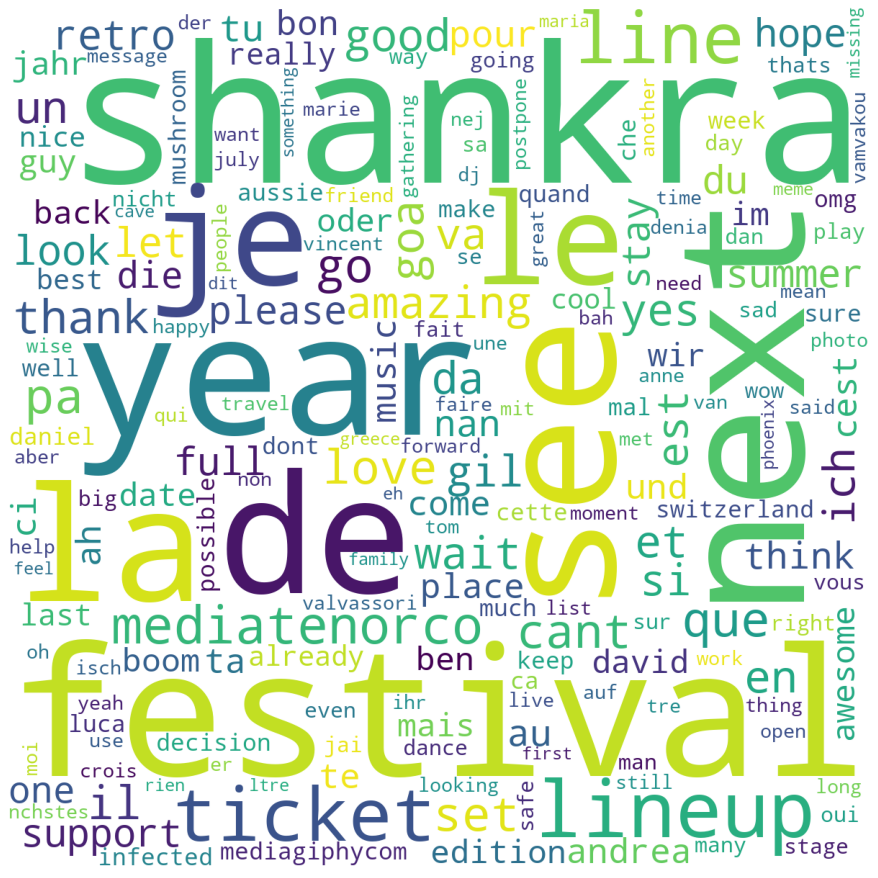

In [44]:
# In Comments, you have a column called comment - Create a wordcloud AFTER cleaning the data properly.

#loading required libraries

from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt
import itertools

#creating wordcloud

comment_df_data = comment_df['fb_com_lemmatized']
#print(comment_df_data[0:])

df_data = list(itertools.chain(*comment_df_data[0:]))

text = ' '.join(df_data)
stopwords = set(STOPWORDS)
#stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(collocations=False , width = 1200, height = 1200, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(str(text))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# Q4 - Reshape the Data 
## Using the Reactions Data, Reshape the Data from Long to Wide 
 - New data will have Columns called Date, Reaction_What , Count of Reactions and Minimum Date to Maximum Dates (*Join Post_List and Reactions to get Date)

In [45]:
df_reshape = df_reactions.copy()

In [46]:
df_reshape_data = pd.merge(df_reshape, df_posts, on='Post_URL', how='left')
df_reshape_data.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL,post_date,Post_Text,Post_Embedded_URL
0,Aremacs Sud-Est,https://m.facebook.com/AremacsSudEst/,Like,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagazine/,Love,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021
2,Vale DeKÃ¬,https://m.facebook.com/vale.deki.5,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021
3,AndrÃ© Novais,https://m.facebook.com/andre.novais.7777,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021
4,Luca Luca,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021


In [47]:
url_total_count.reset_index(inplace=True)
url_total_count.rename(columns={"index": "Post_URL"}, inplace=True)

In [48]:
tlt_reshape_data_df= pd.merge(df_reshape_data, url_total_count, on="Post_URL", how = 'left')
tlt_reshape_data_df.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL,post_date,Post_Text,Post_Embedded_URL,Comment_count,Reaction_count,Share_count,Total_reactions
0,Aremacs Sud-Est,https://m.facebook.com/AremacsSudEst/,Like,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021,47.0,96,21.0,164.0
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagazine/,Love,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021,47.0,96,21.0,164.0
2,Vale DeKÃ¬,https://m.facebook.com/vale.deki.5,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021,47.0,96,21.0,164.0
3,AndrÃ© Novais,https://m.facebook.com/andre.novais.7777,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021,47.0,96,21.0,164.0
4,Luca Luca,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,"Dear Shankra Family, \n first of all, we want to thank each and every person that got a ticket f...",http://bit.ly/ShankraTickets2021,47.0,96,21.0,164.0


In [49]:
tlt_reshape_data_df.drop(['Post_Text','Post_Embedded_URL','Comment_count','Share_count','Total_reactions'], axis=1,inplace=True)
tlt_reshape_data_df.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL,post_date,Reaction_count
0,Aremacs Sud-Est,https://m.facebook.com/AremacsSudEst/,Like,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,96
1,Psytranceworldwidemagazine,https://m.facebook.com/psytranceworldwidemagazine/,Love,Page,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,96
2,Vale DeKÃ¬,https://m.facebook.com/vale.deki.5,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,96
3,AndrÃ© Novais,https://m.facebook.com/andre.novais.7777,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,96
4,Luca Luca,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=3095909017197506&id=632170870238012&__tn__=-R,2020-07-22,96


In [50]:
tlt_reshape_data_df.sort_values(by='post_date',inplace=True)
tlt_reshape_data_df.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL,post_date,Reaction_count
2747,Shachar Pich,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
2680,Ovidiu Liviu Sima,https://m.facebook.com/ovidiuliviu.sima.73,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
2681,Angelina Santos,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
2682,Jibok Barua,https://m.facebook.com/jibok.barua.372,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
2683,Pedro Jardim,https://m.facebook.com/Pedronjg,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91


In [51]:
tlt_reshape_data_df.reset_index(drop=True,inplace=True)
tlt_reshape_data_df.head()

,Reactions_By,Reactions_By_URL,Reactions_What,Page_Or_Person,Post_URL,post_date,Reaction_count
0,Shachar Pich,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
1,Ovidiu Liviu Sima,https://m.facebook.com/ovidiuliviu.sima.73,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
2,Angelina Santos,https://m.facebook.com/profile.php,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
3,Jibok Barua,https://m.facebook.com/jibok.barua.372,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91
4,Pedro Jardim,https://m.facebook.com/Pedronjg,Like,Person,https://m.facebook.com/story.php?story_fbid=2425092914279123&id=632170870238012&__tn__=-R,2019-10-01,91


In [52]:
tlt_reshape_data_df.dtypes

Reactions_By                object
Reactions_By_URL            object
Reactions_What              object
Page_Or_Person              object
Post_URL                    object
post_date           datetime64[ns]
Reaction_count               int64
dtype: object

In [53]:
# saving the dataframe
tlt_reshape_data_df.to_csv(r'Abhijeet_Modanwal_Data.csv', index=False)